In [1]:
from IPython.core.display import HTML
from urllib.request import urlopen

url = 'https://framagit.org/debimax/cours-debimax/raw/master/static/custom.css?inline=false'
with urlopen(url) as response:
    styles = response.read().decode("utf8")
styles = f"<style>\n{styles}\n</style>"
HTML(styles)

<p>Document sous <a  href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.fr">licence CC BY-NC-SA 4.0</a></p>
<center>
<table >
    <tr style="background-color: #17818e;">
        <th style="text-align: center;  color:#FFFFFF;">Contenus</th><th style="text-align: center;  color:#FFFFFF;"> Capacités attendues </th><th style="text-align: CENTER;  color:#FFFFFF;">  Commentaires </th> 
    </tr>   
    <tr>
        <td style="text-align: left;">Algorithme des k plus  proches voisins</td>
        <td style="text-align: left;">Écrire un algorithme qui prédit
la classe d'un élément en fonction de la classe majoritaire de ses k plus proches voisins.</td>
        <td style="text-align: left;"> Il s'agit d'un exemple d'algorithme d'apprentissage. </td> 
    </tr>
    </table>
    </center>
    
 [Ref: http://irem.univ-reunion.fr/spip.php?article1020](http://irem.univ-reunion.fr/spip.php?article1020)

# Knn

- Le 14 février 2016, pour la première fois depuis leur mise en service et plus de **trois millions de kilomètres** roulés, une voiture sans chauffeur de Google a eu son premier accrochage (sans gravité) avec un bus.
- Le 15 mars 2016, un ordinateur a battu pour la première fois les plus grands champions au jeu de go, jeu pour lequel on pensait qu'il faudrait plus d'un siècle pour qu'un ordinateur réussisse à y jouer.

A leur manière, chacun de ces événements marque d'indéniables progrès dans ce que l'on a coutume d'appeler l'"**intelligence artificielle**" : c'est à dire que des programmes informatiques sont capables de résoudre des tâches apparemment très complexes et qui nécessitent, pour les êtres humains, un apprentissage souvent long.

Plutôt que de demander à un ingénieur ou un technicien d'ajuster les paramètres d'un programme, c'est un programme appelé "programme d'apprentissage" qui
s'en charge.

nous allons explorer le fonctionnement d'une des plus anciennes mais aussi de l'une des plus efficaces de ces méthodes d'apprentissage : la méthode des plus proches voisins. Cette méthode n'a pas été utilisée dans le cas de la voiture sans chauffeur. Néanmoins les concepts fondamentaux que nous allons dégager sont généraux et concernent toutes les méthodes d'apprentissage.

la méthode que nous allons étudier est très utilisée dans un domaine qui nous concerne tous : la recommandation de produits.  
En effet, qui n'a pas été étonné du caractère extrêmement ciblé des publicités sur Internet ? Le principe du ciblage des publicités est de récupérer des données sur les utilisateurs puis d'utiliser un programme d'apprentissage automatique pour prédire quels sont les produits les plus susceptibles d'intéresser le consommateur. Les programmes les plus efficaces en ce domaine utilisent assez souvent la **méthode des plus proches voisins**.

##  Découverte

### Le principe de la méthode

Plutôt que de la présenter dans un cadre trop général, présentons la méthode dans un cas particulier à partir duquel il sera très facile d'extrapoler le cas général.

On considère deux phénomènes, chacun générant des points dans le plan. 
- Le premier phénomène génère des points "bleus" 
-  et l'autre des points "rouges". 
La situation est représentée par la figure ci-dessous. En d'autres termes nous considérons que nos points peuvent avoir deux modalités (dans un contexte médical cela pourrait être "sain" ou "malade", dans un contexte de conduite autonome "conduite acceptable", "conduite dangereuse") et ont deux dimensions qui peuvent représenter diverses caractéristiques (la vitesse et la distance au véhicule qui précède dans le cas de la conduite automatique).

[3.2250708664566243]


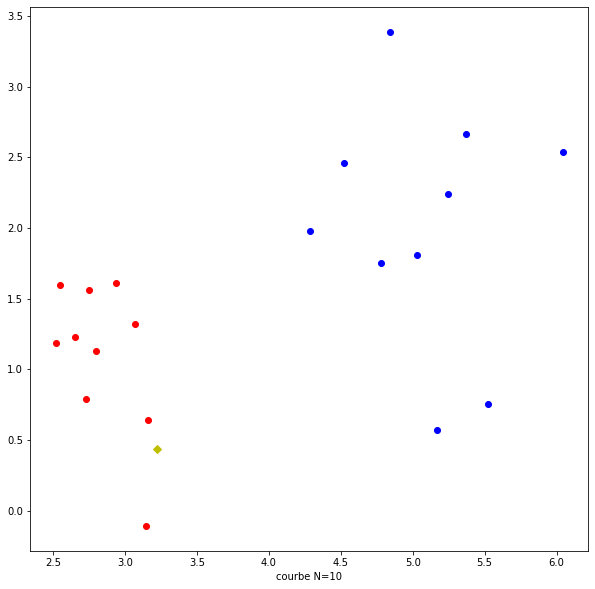

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
from random import *
Ncourbe=10
fig = plt.figure(figsize=(10, 10))


def courbe(N):
    '''N est le nombre de points de la courbe par couleur
    i est le numero de la courbe à placer
    '''
    X1 = [ gauss(3,0.5) for i in range(N) ]
    Y1 = [ gauss(1,0.5) for i in range(N) ]
    X2 = [gauss(5,1) for i in range(N)]
    Y2 = [gauss(2,1) for i in range(N)]
    Xb = [gauss(5,1)]
    Yb = [gauss(2,1)]
    Xr = [gauss(3,0.5)]
    Yr = [gauss(1,0.5)]
    print(Xr)
    axe = fig.add_subplot(111)
    axe.set_xlabel(f'courbe N={N}') 
    axe.plot(X1,Y1,'ro')
    axe.plot(X2,Y2,'bo')
    axe.plot(Xr,Yr,'yD')

    
courbe(10)

Le point jaune est celui dont la couleur (ou le comportement) est à déterminer
Un script Python a été sollicité pour fabriquer des nuages de points, l'un bleu, l'autre rouge, chaque nuage étant formé de points gaussiens dont les paramètres ont été choisis de manière que les nuages s'interpénètrent légèrement. Voici le script :

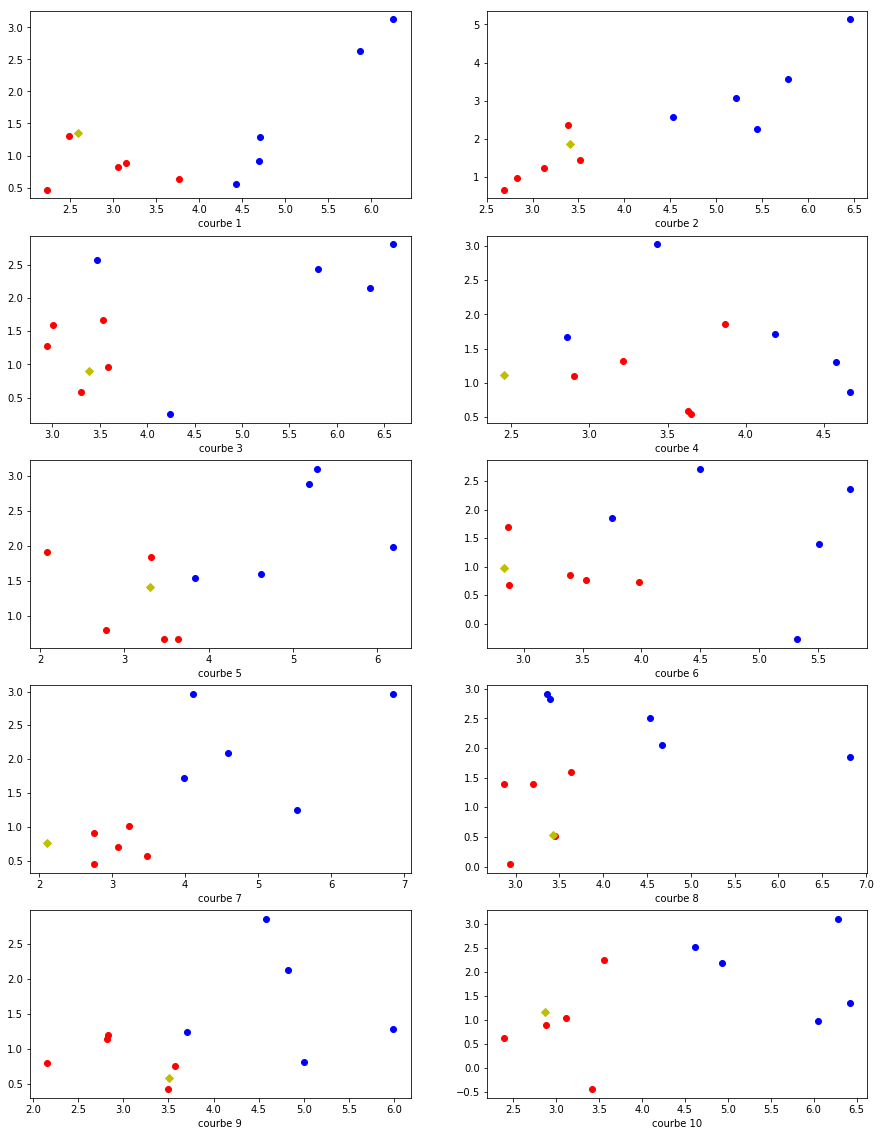

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
from random import *

Ncourbe=10

fig = plt.figure(figsize=(15, 20))
Liste_axe=[ fig.add_subplot(Ncourbe//2, 2, i)  for i in range(1,1+Ncourbe)]

def courbe(N,i):
    '''N est le nombre de points de la courbe par couleur
    i est le numero de la courbe à placer
    '''
    
    X1 = [ gauss(3,0.5) for i in range(N) ]
    Y1 = [ gauss(1,0.5) for i in range(N) ]
    X2 = [gauss(5,1) for i in range(N)]
    Y2 = [gauss(2,1) for i in range(N)]
    Xb = [gauss(5,1)]
    Yb = [gauss(2,1)]
    Xr = [gauss(3,0.5)]
    Yr = [gauss(1,0.5)]
    
    #Liste_axe.append(fig.add_subplot(5, 2, i))
    Liste_axe[i-1].set_xlabel(f'courbe {i}') 
    Liste_axe[i-1].plot(X1,Y1,'ro')
    Liste_axe[i-1].plot(X2,Y2,'bo')
    Liste_axe[i-1].plot(Xr,Yr,'yD')

for i in range(1,11):
    courbe(5,i)

Voici une manière possible d'expliquer pourquoi le point ci-dessous est rouge :

<img  alt="cercle" src="http://irem.univ-reunion.fr/IMG/png/bleuets3.png" width="400" />

Le regard, aidé par le tracé d'un cercle centré sur le point dont la couleur est à déterminer, dit que

-  le plus proche voisin est rouge,
-  les 2 plus proches voisins sont rouges,
-  les 3 plus proches voisins sont rouges,
-  les 4 plus proches voisins sont rouges,
-  4 des 5 plus proches voisins sont rouges...

ce qui suggère une forte probabilité que le point de couleur inconnue est, en réalité, rouge (ce qui dans le cas présent est vrai).  
Et en même temps on gagne un algorithme pour déterminer la couleur probable : prendre la couleur majoritaire parmi les 3 plus proches voisins.  
Cet algorithme est appelé **3nn*** (abréviation de « ***3 nearest neighbours*** ») ou « des ***3 plus proches voisins*** ». 

C'est un cas particulier de la méthode des ***k plus proches voisins***.

Le choix de k=3 est pertinent lorsqu'il y a deux couleurs possibles, parce que parmi 3 éléments, il y a forcément une couleur majoritaire (3 est impair).  
S'il y a 3 couleurs possibles, on court le risque que parmi les trois plus proches voisins, il y ait exactement un rouge, un vert et un bleu. Dans ce cas, on aurait plutôt intérêt à choisir k=5, ce qui évite à la fois les risques d'ex aequo entre 2 couleurs et entre les 3 couleurs.

%%j<img alt=""  src="http://irem.univ-reunion.fr/IMG/png/knn3couleurs.png"  width=400/>